- title : 영화의 제목
- distributor : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝수
- num_actor : 주연배우수
- box_off_num : 관객수

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
test = pd.read_csv("./data/movies_test.csv")
train = pd.read_csv("./data/movies_train.csv")
mission = pd.read_csv("./data/submission.csv")
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 방지

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


- 오브젝트 타입이 많은 것이 특징
- 장르도 600개인 것으로 보아 장르를 영화당 장르 하나로 분류했음
- dir_prev_bfnum 컬럼의 널값을 보아 집계된 영화를 만들어 본 분이 270명 밖에 안됨
- dir_prev_bfnum 데이터를 살리려면 특정 감독의 변화 추이가 있어야 예측 데이터가 생길듯

In [7]:
train["distributor"].value_counts()

distributor
CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: count, Length: 169, dtype: int64

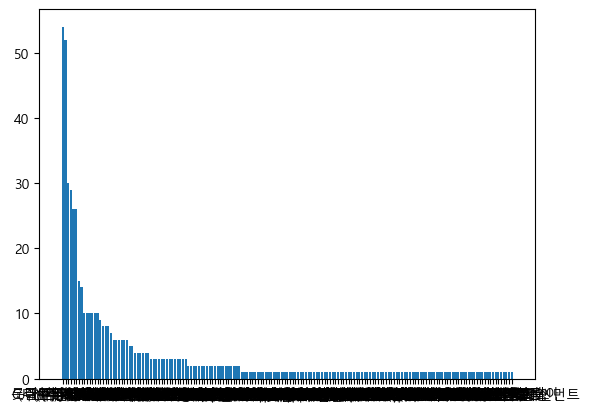

In [8]:
# 영화사 시각화

x = train["distributor"].value_counts().index
y = train["distributor"].value_counts().values

plt.bar(x, y)

plt.show()

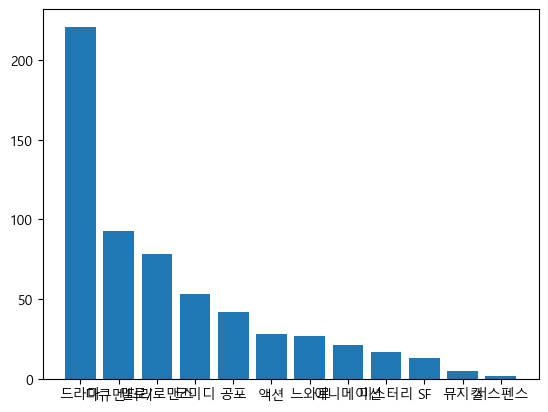

In [9]:
# 장르 시각화

x = train["genre"].value_counts().index
y = train["genre"].value_counts().values

plt.bar(x, y)

plt.show()

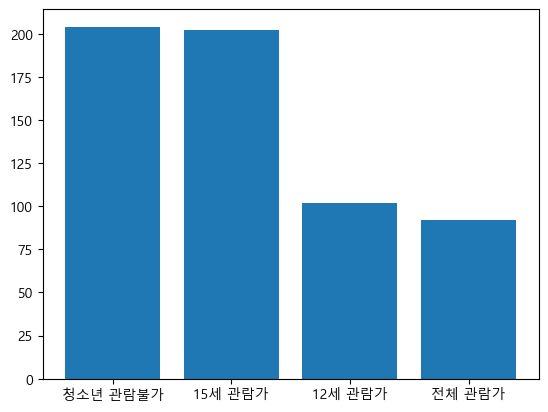

In [10]:
# 관람가 시각화

x = train["screening_rat"].value_counts().index
y = train["screening_rat"].value_counts().values

plt.bar(x, y)

plt.show()

In [11]:
train["director"].value_counts()

director
홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: count, Length: 472, dtype: int64

- 영화사 컬럼을 보니 약간의 독과점 현상이 벌어지는 듯하다
- 장르도 괜찮게 분포되어 있다
- 관람가도 좋고
- 감독은 고르게 분포되어 있어 크게 영향을 주지 못할 것 같다
- 타이틀과 영화 감독을 제외하고 원핫 인코딩 진행하자

In [12]:
onehot_distributor = pd.get_dummies(train["distributor"], prefix = "dist")
onehot_genre = pd.get_dummies(train["genre"], prefix = "gen")
onehot_screening_rat = pd.get_dummies(train["screening_rat"], prefix = "scr")

In [13]:
y_r = train["release_time"].str[:4] # 개봉년도

In [14]:
y_r.head()

0    2012
1    2015
2    2013
3    2012
4    2010
Name: release_time, dtype: object

In [15]:
y_r.value_counts()

release_time
2014    127
2015    120
2013     95
2010     90
2012     88
2011     80
Name: count, dtype: int64

In [16]:
m_r = train["release_time"].str[5:7] # 개봉 월

In [17]:
m_r.value_counts()

release_time
11    72
10    60
09    60
05    57
08    55
03    52
07    49
12    49
04    47
01    39
02    31
06    29
Name: count, dtype: int64

- 매핑으로 시즌 컬럼을 만들어보자
- 우선 개봉 년도 데이터랑 개봉 월 추가해주고

In [18]:
train["year_r_t"] = train["release_time"].str[:4]

In [19]:
train["month_r_t"] = train["release_time"].str[5:7]

In [20]:
train["year_r_t"] = train["year_r_t"].astype(int)
train["month_r_t"] = train["month_r_t"].astype(int)

In [21]:
train.dtypes

title              object
distributor        object
genre              object
release_time       object
time                int64
screening_rat      object
director           object
dir_prev_bfnum    float64
dir_prev_num        int64
num_staff           int64
num_actor           int64
box_off_num         int64
year_r_t            int32
month_r_t           int32
dtype: object

In [22]:
def what_season(season):
    if season in (3, 4, 5):
        return "spring"
    elif season in (6, 7, 8):
        return "summer"
    elif season in (9, 10, 11):
        return "fall"
    else:
        return "winter"

In [23]:
train["season"] = train["month_r_t"].map(what_season)

In [24]:
train["season"]

0        fall
1        fall
2      summer
3      summer
4        fall
        ...  
595    summer
596    spring
597      fall
598    spring
599    winter
Name: season, Length: 600, dtype: object

In [34]:
train["month_r_t"]

0      11
1      11
2       6
3       7
4      11
       ..
595     8
596     3
597     9
598     5
599     1
Name: month_r_t, Length: 600, dtype: int32

- 10개 대조해보니 잘 된 것 같다

In [38]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year_r_t,month_r_t,season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012,11,fall
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11,fall
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6,summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7,summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11,fall
